### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports all the necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler  
import nltk 
import os 
import string
string.punctuation
nltk.download ('punkt')
nltk.download ('stopwords')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import words
from textblob import TextBlob
from scipy.stats import norm
stop_words = set(stopwords.words('english'))
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mikeb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mikeb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv') 

# Print & View the DataFrame.
print(reviews.info())
reviews.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
# Replace the missing values with 0.
reviews.fillna(0, inplace=True)

# Determine the number of missing values.
print (reviews.isna().sum())
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.drop_duplicates()
print (reviews.shape)
print(reviews.value_counts())

(2000, 11)
gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  education     language  platform  product  review                                                                                                                                                                               summary          
Female  17   13.94              40                      233             postgraduate  EN        Web       7573     My son (8) and daughter (11) were and still are intrigued by this toy                                                                                                                Five Stars           1
Male    29   22.96              82                      1150            postgraduate  EN        Web       2261     Fun game. A little complicated, but fun once you understand how it works.                                                                                                            Five Stars           1
             71.34              13   

In [5]:
# Descriptive statistics.
reviews.describe() 

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews.drop(['language', 'platform'], axis=1, inplace=True)

# View column names.
reviews.columns.values
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [7]:
# Rename the column headers.
reviews.rename(columns={"remuneration (k£)": "renumeration", "spending_score (1-100)": "spending_score"}, inplace=True)

# View column names.
reviews.columns.values

array(['gender', 'age', 'renumeration', 'spending_score',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype=object)

## FURTHER DATA WRANGLING AND EXPLORING 

In [8]:
#Explore men and women
pd.set_option('display.float_format', '{:.2%}'.format)
gen1=reviews['gender'].value_counts(normalize=True)
gen1

Female   56.00%
Male     44.00%
Name: gender, dtype: float64

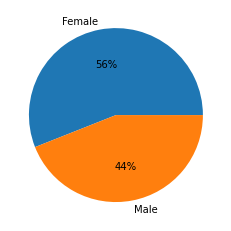

In [9]:
#Visualize the query
#define Seaborn color palette to use
labels = ['Female', 'Male']
#create pie chart
plt.pie(gen1, labels = labels, autopct='%.0f%%')
plt.show()

* Almost balanced gender diversity with a slight edge to Female customers and if this edge (or sample)</br> 
is representative of actual situation it can give a direction to stakeholders as it is quite an advantage to attract</br> 
Female clientele on a stereotypically "male endorsed" market

In [10]:
#Reset the%
pd.reset_option('display.float_format')

In [11]:
#Explore mean between Male and Female renumeration and spending score
reviews1=reviews.groupby('gender')['renumeration','spending_score'].aggregate('mean').round(decimals=1)
reviews1

,renumeration,spending_score
gender,,
Female,47.3,50.7
Male,49.1,49.1


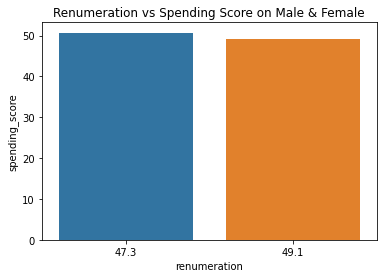

In [12]:
#Visualise
labels = ['Female', 'Male']
plt.title("Renumeration vs Spending Score on Male & Female")
sns.barplot(data=reviews1, x="renumeration", y="spending_score");

* Even though there is a slight edge on females customers in our sample</br>
the mean figures between spending and earning seem to be pretty balanced

In [13]:
#Categorise by education
gen2 = reviews.groupby('education').aggregate({'education':'count',\
                                                'renumeration':['min','max','median'],\
                                                'spending_score':['min','max','median','sum'],\
                                                'loyalty_points':['min','max','median','sum']}).\
                                                reset_index()
                           
gen2


education       renumeration                spending_score             \
                count          min     max median            min max median   
0         Basic    50        14.76   98.40  63.14              6  97   45.0   
1           PhD   460        12.30  112.34  48.38              1  99   47.0   
2       diploma   190        12.30  112.34  39.36              4  92   46.0   
3      graduate   900        12.30  112.34  47.15              3  99   53.0   
4  postgraduate   400        12.30  112.34  49.20              1  99   50.0   

         loyalty_points                         
     sum            min   max  median      sum  
0   2663             66  4837  1622.0   113252  
1  21448             30  6020  1232.0   689885  
2   7788             51  6847  1239.0   253844  
3  47810             25  6208  1285.0  1499452  
4  20291             35  6232  1281.0   599631

### We can see from above results a type correlation. between 'renumeration', 'spending_score' and 'loyalty_points'

In [14]:
# Using DataFrame.transform() method.
gen3=reviews.groupby(['education'])\
.agg({'renumeration' : 'sum'})[['renumeration']]\
.apply(lambda x: 100*x/x.sum())\
.sort_values(by='renumeration', ascending=False)
gen3

,renumeration
education,
graduate,44.272850
PhD,24.504972
postgraduate,19.512050
diploma,8.612044
Basic,3.098085


The biggest part of our clientele has a graduate educational profile with second best PhD and 3rd best postgrads (info to be used from marketing)

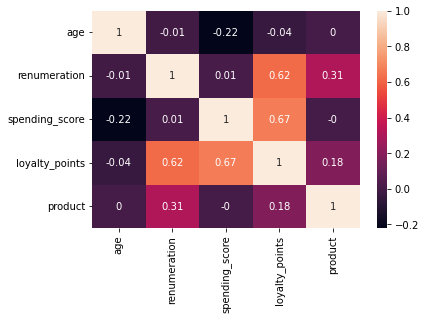

In [15]:
#Create a correlation matrix to check info
matrix = reviews.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

## 4. Save the DataFrame as a CSV file

In [16]:
# Create a CSV file as output.
reviews.to_csv('turtle_reviews_clean.csv', index=False)

In [17]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('turtle_reviews_clean.csv') 

# View DataFrame.
reviews.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [18]:
#Check correlation between values to get a general idea
reviews.corr()

,age,renumeration,spending_score,loyalty_points,product
age,1.000000,-0.005708,-0.224334,-0.042445,0.003081
renumeration,-0.005708,1.000000,0.005612,0.616065,0.305309
spending_score,-0.224334,0.005612,1.000000,0.672310,-0.001649
loyalty_points,-0.042445,0.616065,0.672310,1.000000,0.183600
product,0.003081,0.305309,-0.001649,0.183600,1.000000


***REMEMBER CORRRELATION DOES NOT IMPLY CAUSATION**</br>
Since we work with a sample of data, if we obtain a different sample it’s possible we could have different correlation scores.</br>
As such we need to assess the significance of the correlation values we calculated, which depends on the sample size. 

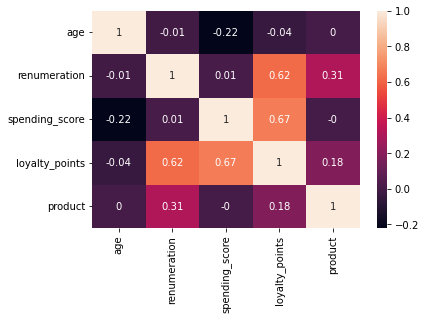

In [19]:
#Make a  correlation matrix for better vizualization
# Visualizing a Pandas Correlation Matrix Using Seaborn
matrix = reviews.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

## IMPORTANT POINT</br>
There is a strong correlation between spending_score and loyalty points as well between spending score and renumeration.</br>
While the latter might be more evident to spot or even assume, in referance to the loyalty points our metadata file is not</br>
clearly communicating whether there is any confirmed loyalty programs or the loyalty points are just an "insiders" metric

## 5. Linear regression

### 5a) spending vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        22:18:32   Log-Likelihood:                -8759.4
No. Observations:                2000   AIC:                         1.752e+04
Df Residuals:                    1998   BIC:                         1.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4260      0.685     41.504      0.000      27.083      29.769
x1             0.0137      0.000     40.595      0.000       0.013       0.014
==============================================================================
Omnibus:                      169.397   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.607
Skew:                           0.768   Prob(JB):                     6.81e-47
Kurtosis:                       3.441   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

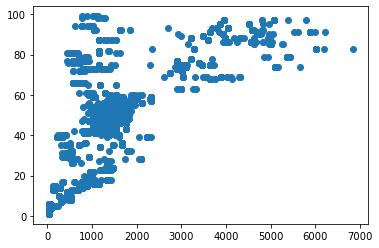

In [20]:
# Independent variable/explanatory.
x1=reviews['loyalty_points']

# Dependent variable/response.
y1=reviews['spending_score']

# Check for linearity with Matplotlib.
plt.scatter(x1, y1)

# OLS model and summary.
# Create formula and pass through OLS methods.
f1 = 'y1 ~ x1'
model1 = ols(f1, data = reviews).fit()

# View the output.
model1.summary()

In [21]:
# Extract the estimated parameters.
print("Parameters: ", model1.params)  

# Extract the standard errors.
print("Standard errors: ", model1.bse)

# Extract the predicted values.
print("Predicted values: ", model1.predict()) 

Parameters:  Intercept    28.426033
x1            0.013671
dtype: float64
Standard errors:  Intercept    0.684905
x1           0.000337
dtype: float64
Predicted values:  [ 31.29703545  35.58986696  28.97289101 ... 105.17748592  42.75370042
  34.97465225]


In [22]:
# Set the X coefficient to 28.426 and the constant to 0.0137 generate the regression table.
y_pred1 = 28.426 + 0.0137 * reviews['loyalty_points']

# View the output.
y_pred1

0        31.3030
1        35.6048
2        28.9740
3        36.1254
4        33.4402
          ...   
1995     83.6507
1996     35.8103
1997    105.3378
1998     42.7836
1999     34.9883
Name: loyalty_points, Length: 2000, dtype: float64

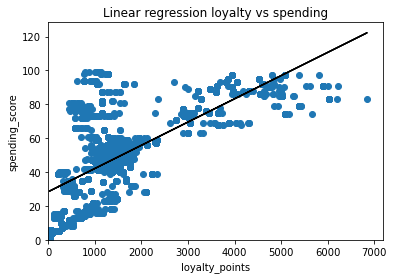

In [23]:
# Plot the data points with a scatterplot.
plt.scatter(x1, y1)

# Plot the regression line (in black).
plt.plot(x1, y_pred1, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)
plt.xlabel('loyalty_points') 
plt.ylabel('spending_score') 
  
# displaying the title
plt.title("Linear regression loyalty vs spending")
# View the plot.
plt.show()

### 5b) renumeration vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        22:18:50   Log-Likelihood:                -8641.8
No. Observations:                2000   AIC:                         1.729e+04
Df Residuals:                    1998   BIC:                         1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5606      0.646     47.321      0.000      29.294      31.827
x2             0.0111      0.000     34.960      0.000       0.010       0.012
==============================================================================
Omnibus:                      382.801   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.257
Skew:                           1.230   Prob(JB):                    1.90e-143
Kurtosis:                       4.357   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

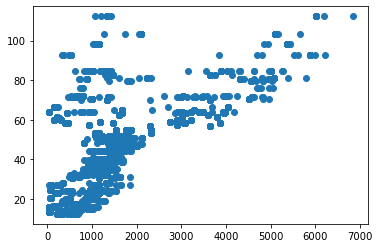

In [24]:
# Independent variable/explanatory.
x2=reviews['loyalty_points']

# Dependent variable/response.
y2=reviews['renumeration']

# Check for linearity with Matplotlib.
plt.scatter(x2, y2)

# OLS model and summary.
# Create formula and pass through OLS methods.
f2 = 'y2 ~ x2'
model2 = ols(f2, data = reviews).fit()

# View the output.
model2.summary()

In [25]:
# Extract the estimated parameters.
print("Parameters: ", model2.params)  

# Extract the standard errors.
print("Standard errors: ", model2.bse)

# Extract the predicted values.
print("Predicted values: ", model2.predict()) 

Parameters:  Intercept    30.560555
x2            0.011101
dtype: float64
Standard errors:  Intercept    0.645817
x2           0.000318
dtype: float64
Predicted values:  [32.89186761 36.3777352  31.00461446 ... 92.88431491 42.19491551
 35.87816819]


In [26]:
# Set the X coefficient to 30.5605 and the constant to 0.0111 generate the regression table.
y_pred2 = 30.5606 + 0.0111 * reviews['loyalty_points']

# View the output.
y_pred2.sort_values (ascending=False)

1871    106.5623
1986     99.7358
1769     99.4694
1706     97.3826
1399     97.3826
          ...   
1008     30.9047
408      30.9047
608      30.9047
1809     30.8936
1401     30.8381
Name: loyalty_points, Length: 2000, dtype: float64

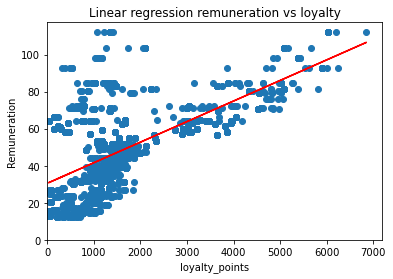

In [27]:
# Plot the data points with a scatterplot.
plt.scatter(x2, y2)

# Plot the regression line (in black).
plt.plot(x2, y_pred2, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)
plt.xlabel('loyalty_points') 
plt.ylabel('Remuneration') 
  
# displaying the title
plt.title("Linear regression remuneration vs loyalty")
# View the plot.
plt.show()

### 5c) age vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0577
Time:                        22:19:04   Log-Likelihood:                -8051.8
No. Observations:                2000   AIC:                         1.611e+04
Df Residuals:                    1998   BIC:                         1.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.2035      0.481     83.615      0.000      39.261      41.146
x3            -0.0004      0.000     -1.899      0.058      -0.001    1.47e-05
==============================================================================
Omnibus:                       99.357   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.564
Skew:                           0.574   Prob(JB):                     3.61e-25
Kurtosis:                       2.814   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

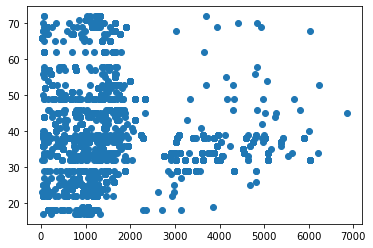

In [28]:
# Independent variable/explanatory.
x3=reviews['loyalty_points']

# Dependent variable/response.
y3=reviews['age']

# Check for linearity with Matplotlib.
plt.scatter(x3, y3)

# OLS model and summary.
# Create formula and pass through OLS methods.
f3 = 'y3 ~ x3'
model3 = ols(f3, data = reviews).fit()

# View the output.
model3.summary()

In [29]:
# Extract the estimated parameters.
print("Parameters: ", model3.params)  

# Extract the standard errors.
print("Standard errors: ", model3.bse)

# Extract the predicted values.
print("Predicted values: ", model3.predict()) 

Parameters:  Intercept    40.203457
x3           -0.000449
dtype: float64
Standard errors:  Intercept    0.480816
x3           0.000236
dtype: float64
Predicted values:  [40.10917768 39.96820745 40.18549915 ... 37.683053   39.73295776
 39.98841019]


In [30]:
# Set the X coefficient to 40.2034 and the constant to -0.0004 generate the regression table.
#Linear Regression reminder y = mx + b. 
y_pred3 = 40.2034 + (-0.0004) * reviews['loyalty_points']

# View the output.
y_pred3

0       40.1194
1       39.9938
2       40.1874
3       39.9786
4       40.0570
         ...   
1995    38.5910
1996    39.9878
1997    37.9578
1998    39.7842
1999    40.0118
Name: loyalty_points, Length: 2000, dtype: float64

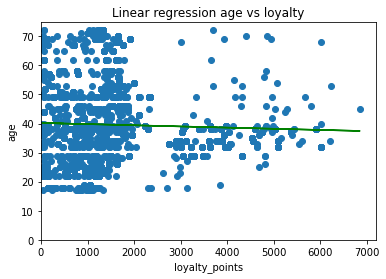

In [31]:
# Plot the data points with a scatterplot.
plt.scatter(x3, y3)

# Plot the regression line (in black).
plt.plot(x3, y_pred3, color='green')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)
plt.xlabel('loyalty_points') 
plt.ylabel('age') 
  
# displaying the title
plt.title("Linear regression age vs loyalty")
# View the plot.
plt.show()

## 6. Observations and insights

## Case1 - Spending vs loyalty points
> - $R^2$: 45% of the total variability of `y` (spending score), is explained by the variability of `X` (how many purchases done).  
> - F-stat:is very high but p-value is very low (2.92e -263) as such greater the statistical significance. 
> - `X`: The coefficient of `X` tells us, if the length that the customer has been a member (`X`) changes by 1 unit (please check units used) the money spent (`y`) will change by 64.2187 units (spending score assigned). 
>  - The `t`-value being at 41.5 shows that slope is not significant.

## Case2 - Renumeration vs loyalty points
> - $R^2$: 38% of the total variability of `y` (total income of each customer per year), is explained by the variability of `X` (how many purchases done).  
> - F-stat:is very high but p-value is very low as such greater the statistical significance. 
> - `X`: The coefficient of `X` shows if the length that the customer has been a member (`X`) changes by 1 unit (ie loyalty point) the money he should be earning (`y`) will change by 30.56 units (k =1000 GBP). 
>  - The `t`-value being at 47 shows that slope is not significant.

## Case 3 - Age vs loyalty points

> - $R^2$: 0.2% of the total variability of `y` (age), is explained by the variability of `X` (how many purchased they have done).  
> - No need to investigate further as it looks that suggested model is not successful

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. K MEANS CLUSTERING

In [32]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [33]:
# Load the CSV file(s) as df2.
# Import new CSV file with Pandas.
df1 = pd.read_csv('turtle_reviews_clean.csv', index_col=False) 

# View DataFrame.
print (df1.info())
df1.head ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [34]:
# Drop unnecessary columns.
df2 = pd.DataFrame(df1, columns=['renumeration', 'spending_score'])


In [35]:
# View column names and Dataframe
print (df2.columns.values)
df2.head()

['renumeration' 'spending_score']


,renumeration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [36]:
# Explore the data.
df2.drop_duplicates()
print (df2.shape)
print(df2.value_counts())

(2000, 2)
renumeration  spending_score
39.36         59                21
32.80         42                20
92.66         8                 16
63.96         1                 16
84.46         69                15
                                ..
60.68         72                 7
56.58         91                 7
              58                 7
54.94         57                 7
57.40         29                 7
Length: 196, dtype: int64


In [37]:
# Descriptive statistics.
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
renumeration,2000.0,48.07906,23.123984,12.3,30.34,47.15,63.96,112.34
spending_score,2000.0,50.00000,26.094702,1.0,32.00,50.00,73.00,99.00


## SCALING
No scaling is required as comparable variables are aligned in terms of values</br>
and both lie on the same scale without one over-shadowing the other

In [38]:
#Check correlation between values to get a general idea
df2.corr()

,renumeration,spending_score
renumeration,1.000000,0.005612
spending_score,0.005612,1.000000


## 2. Plot

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

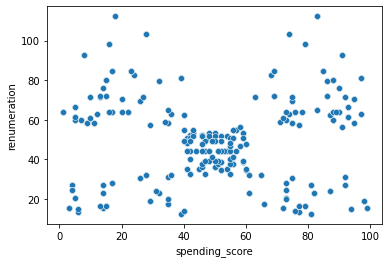

In [39]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spending_score',
                y='renumeration',
                data=df2)

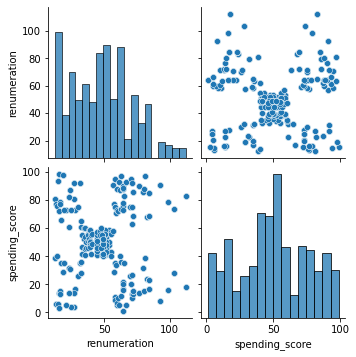

In [40]:
# Create a pairplot with Seaborn.
sns.pairplot(df2)

## 3. Elbow and silhoutte methods

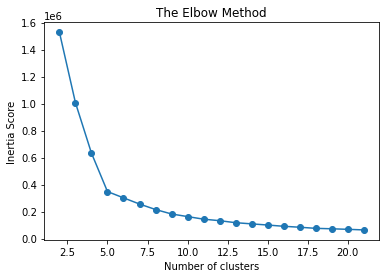

In [41]:
# Determine the number of clusters: Elbow method.
sum_squar = []
for i in range(2, 22):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=0)
    kmeans.fit(df2)
    sum_squar.append(kmeans.inertia_)

# Plot the elbow method. Plots the sum of squared distances from 
#each point to its assigned centre.
plt.plot(range(2, 22),
         sum_squar,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")

plt.show()

Elbow method above shows that the WSS starts to diminish basis 5 or 6 clusters

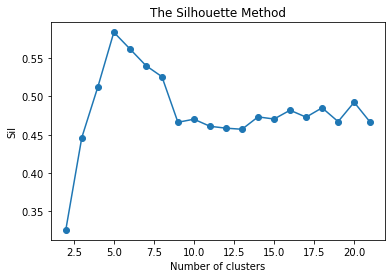

In [42]:
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 21

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

Silhouette Method confirmes elbow that figure should be around 5 or 6

## 4. Evaluate k-means model at different values of *k*

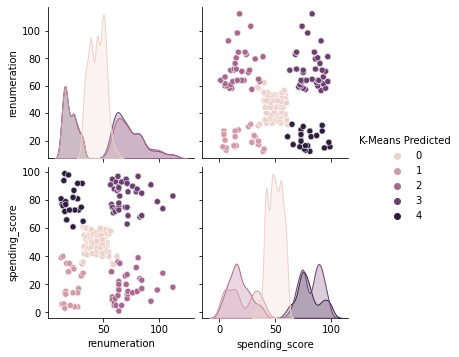

In [43]:
# We will run a first evaluation bss k=5
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [44]:
df2['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

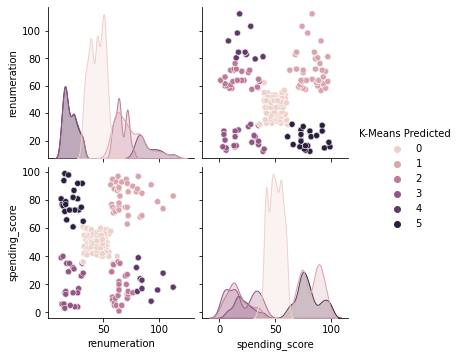

In [49]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [50]:
df2['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

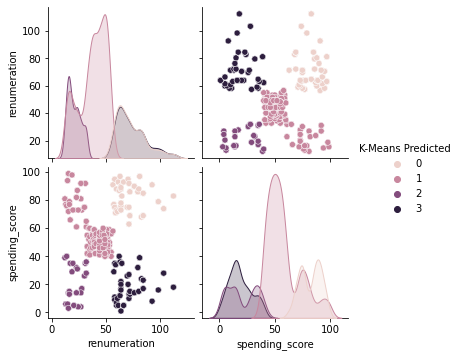

In [51]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [52]:
df2['K-Means Predicted'].value_counts()

1    1013
0     356
3     351
2     280
Name: K-Means Predicted, dtype: int64

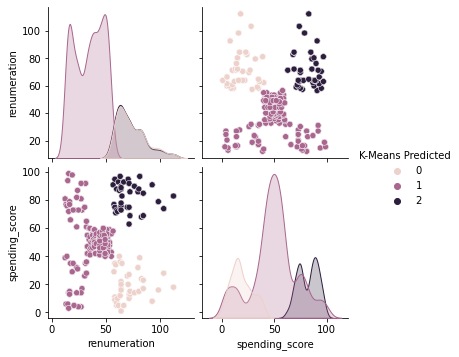

In [53]:
# Use three clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

Basis above testing we will fit the model basis 5 clusters which gives the more balanced predicted results</br> 
as also distinctly useful groupes in the renumeration diagrams.

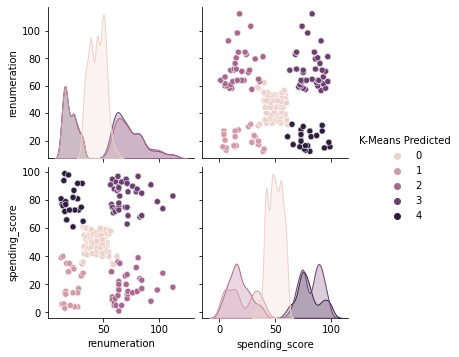

In [45]:
# Apply the final model.
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [46]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()


0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


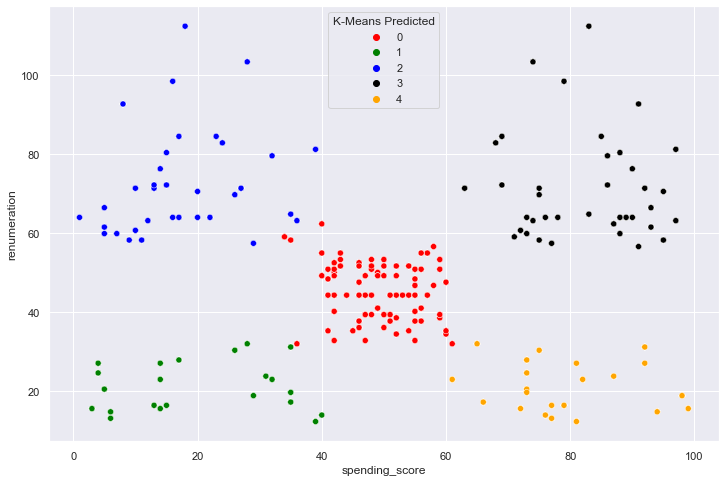

In [47]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spending_score',
                y='renumeration',
                data=df2 , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# View the DataFrame.
print(df2.head())

## (EXPERIMENTING WITH MORE VARIABLES)

In [47]:
df1.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [48]:
#Work with 4 variables to check whether 5 clusters give same business context
# Drop unnecessary columns.
df_test = pd.DataFrame(df1, columns=['age', 'renumeration', 'spending_score', 'loyalty_points'])
df_test.head()


,age,renumeration,spending_score,loyalty_points
0,18,12.30,39,210
1,23,12.30,81,524
2,22,13.12,6,40
3,25,13.12,77,562
4,33,13.94,40,366


In [70]:
#We will require to scale the data due mainly to loyalty_points field

from sklearn.preprocessing import MinMaxScaler

# creating a copy to keep original df as is for later
df3_clust = df_test.copy()

cols_scale = ['age','renumeration','spending_score','loyalty_points']

scaler = MinMaxScaler().fit(df3_clust[cols_scale])
df3_clust[cols_scale] = scaler.transform(df3_clust[cols_scale])

In [71]:
# Descriptive statistics.
df3_clust.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2000.0,0.409000,0.246786,0.0,0.218182,0.381818,0.581818,1.0
renumeration,2000.0,0.357648,0.231147,0.0,0.180328,0.348361,0.516393,1.0
spending_score,2000.0,0.500000,0.266272,0.0,0.316327,0.500000,0.734694,1.0
loyalty_points,2000.0,0.227651,0.188103,0.0,0.109499,0.183377,0.253042,1.0
K-Means Predicted,2000.0,1.859500,1.504956,0.0,0.000000,2.000000,3.000000,5.0


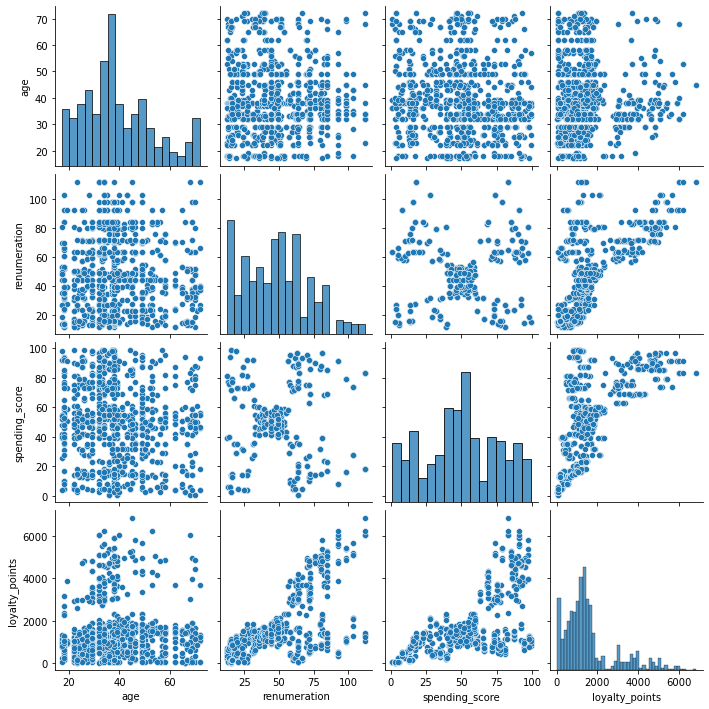

In [50]:
# Create a pairplot with Seaborn.
sns.pairplot(df3)

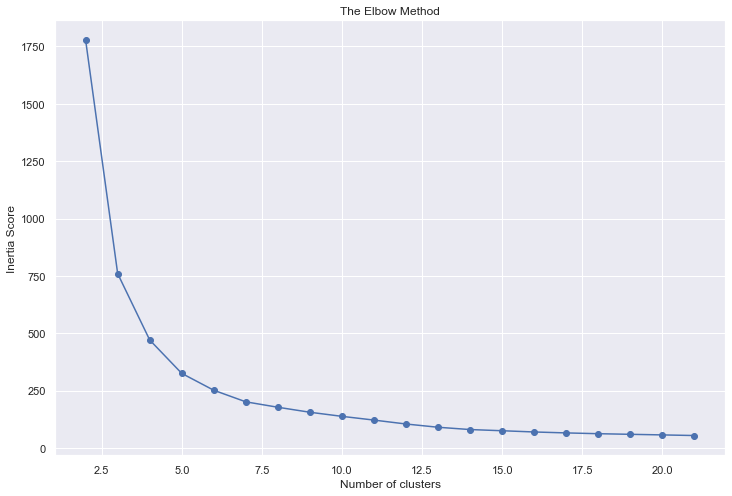

In [72]:
# Determine the number of clusters: Elbow method.
sum_squar = []
for i in range(2, 22):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=0)
    kmeans.fit(df3_clust)
    sum_squar.append(kmeans.inertia_)

# Plot the elbow method. Plots the sum of squared distances from 
#each point to its assigned centre.
plt.plot(range(2, 22),
         sum_squar,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")

plt.show()

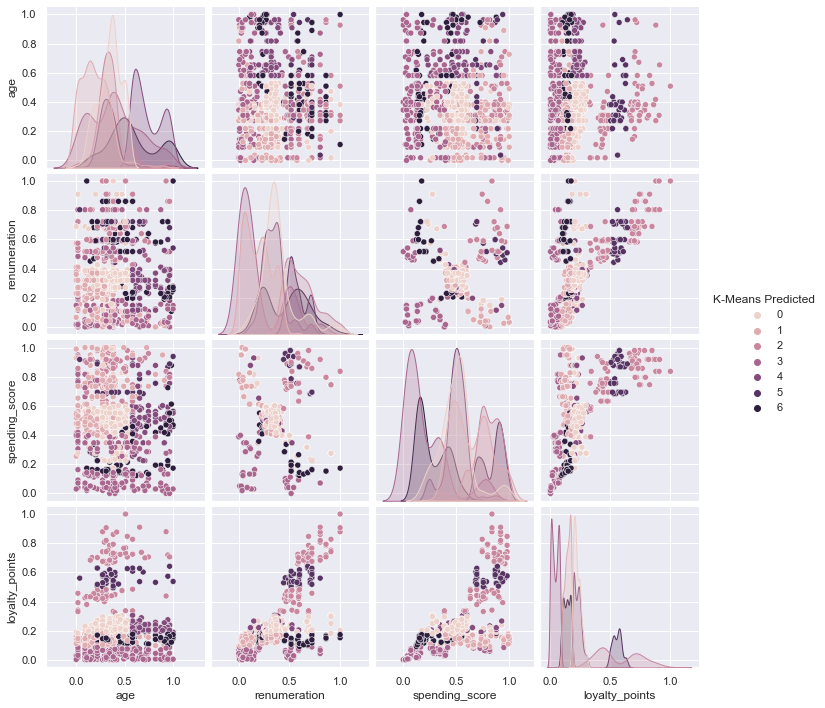

In [77]:
# Run kmeans  bss k=7
kmeans = KMeans(n_clusters = 7, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df3_clust)

clusters = kmeans.labels_

df3_clust['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df3_clust,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [78]:
# Check the number of observations per predicted class.
df3_clust['K-Means Predicted'].value_counts()

3    402
0    365
1    361
4    259
2    248
6    228
5    137
Name: K-Means Predicted, dtype: int64

        age  renumeration  spending_score  loyalty_points  K-Means Predicted
0  0.018182      0.000000        0.387755        0.027118                  3
1  0.109091      0.000000        0.816327        0.073146                  3
2  0.090909      0.008197        0.051020        0.002199                  3
3  0.145455      0.008197        0.775510        0.078716                  3
4  0.290909      0.016393        0.397959        0.049985                  3


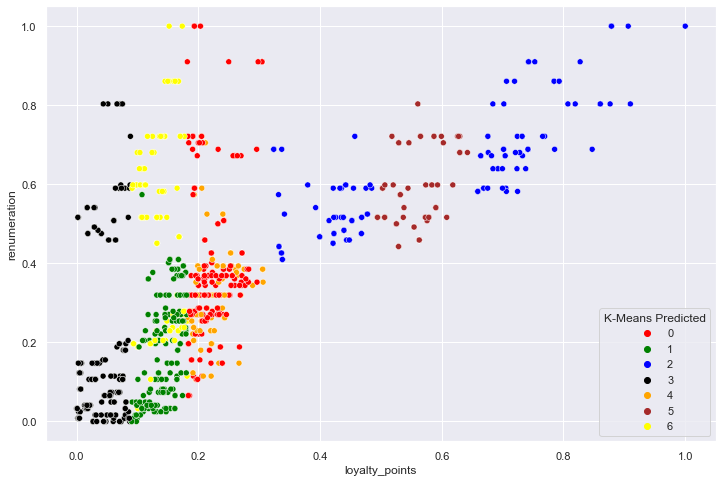

In [81]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='loyalty_points',
                y='renumeration',
                data=df3_clust , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'brown', 'yellow'])

# View the DataFrame.
print(df3_clust.head())

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

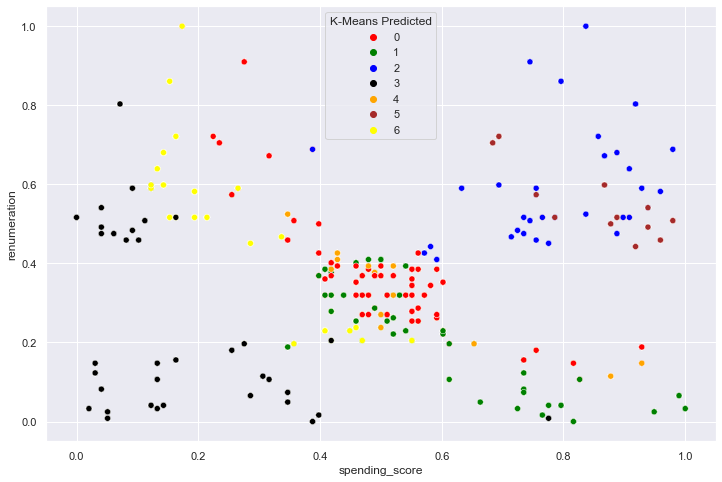

In [82]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spending_score',
                y='renumeration',
                data=df3_clust , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'brown', 'yellow'])

<AxesSubplot:xlabel='spending_score', ylabel='loyalty_points'>

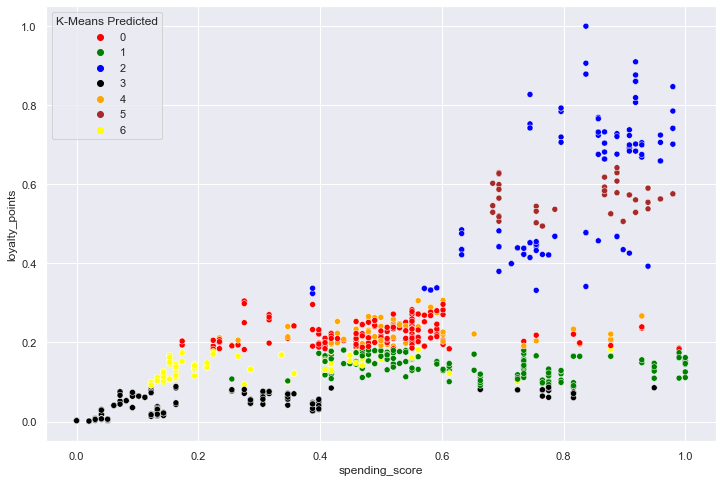

In [83]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spending_score',
                y='loyalty_points',
                data=df3_clust , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'brown', 'yellow'])

## (RESULTS OF EXPERIMENT)
It seems that adding the additional fields did not provide the clarification or extra insight we were after

## Insights and observations
In order to give some business context in the analysis above, we can translate our 5 clusters in following profiles: </br>
**1.The low key - logicals** - Starting from the bottom left, cluster group 1 (GREEN) represents our customers with low yearly renumeration that </br>
spend according to their budget and can stress until limits of following category </br>
**2. Our average Joe - middle class** - Middle class, cluster group 0 (RED) not necessarily justifies her name due to renumeration classification in our plot </br>
but view that a big chunk of our datapoints are centered between an average of 40-60 spending score as well as renumeration</br>
**3. The high earners - savers** - Representing cluster group 2 (BLUE), where we can see individuals with mid and high earnings but keeping same </br>
spending score as individuals earning 1/3 of their yearly income</br>
**4. The high earners - Big Spenders** - Cluster group 3 (BLACK) could represent our high profile VIP customers base</br>
which seem to earn a considerable high year income and spend it accordingly or (relationaly) to our store</br>
**5. The high spenders - Low Earners** - Cluster group4 (ORANGE) representing the fidele clientele our clientele that even</br>
with low to moderated yearly renumeration their spending score equals and in certain cases surpases individuals with 2 or 3 more times their year income

# 

# NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.


## 1. Load and explore the data

In [4]:
# Load the data set as df_NLP.
# Import new CSV file with Pandas.
df_NLP = pd.read_csv('turtle_reviews_clean.csv', index_col=False) 

# View DataFrame.
print (df_NLP.info())
df_NLP.head ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [5]:
# Explore data set.
# Drop the empty rows.
df_NLP.dropna(inplace=True)
#Drop Duplicates
df_NLP.drop_duplicates()
#View the df
print (df_NLP.shape)
print(df_NLP.value_counts())

(2000, 9)
gender  age  renumeration  spending_score  loyalty_points  education     product  review                                                                                                                                                                               summary          
Female  17   13.94         40              233             postgraduate  7573     My son (8) and daughter (11) were and still are intrigued by this toy                                                                                                                Five Stars           1
Male    29   22.96         82              1150            postgraduate  2261     Fun game. A little complicated, but fun once you understand how it works.                                                                                                            Five Stars           1
             71.34         13              567             graduate      7373     They're nice, big, colorful stickers.  You don't get ve

In [16]:
# Keep necessary columns. Drop unnecessary columns.
df3 = pd.DataFrame(df_NLP, columns=['review', 'summary'])

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [17]:
# Determine if there are any missing values.
print (df3.isna().sum())
df3.isnull().sum()

review     0
summary    0
dtype: int64


review     0
summary    0
dtype: int64

* we see that our dataframe contains no null or missing values

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [27]:
#Copy to prepare
df3new = df3.copy ()

In [29]:
# Review: Change all to lower case and join with a space.
df3new['review'] = df3new['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Check column
df3new['review'].head()


0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [30]:
# Summary: Change all to lower case and join with a space.
df3new['summary'] = df3new['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Check column
df3new['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [31]:
df3new.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [33]:
# Replace all the punctuations in review column.
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df3new['review'] = df3new['review'].apply(lambda x:remove_punctuation(x))
#df3new['review'] = df3new['review'].str.replace('[^\w\s]','')


# View output.
df3new.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon master's screen from...
2,nice art nice printing why two panels are fill...,"pretty, but also pretty useless"
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [34]:
# Repeat function for summary column.
df3new['summary'] = df3new['summary'].apply(lambda x:remove_punctuation(x))


# View output.
df3new.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


### 2c) Drop duplicates in both columns

## Checking with complete df (df_NLP) whether duplicates are indeed unique values or not

In [8]:
#Check basis product ID for duplicates
pd.concat(g for _, g in df_NLP.groupby('product') if len(g) > 1)

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
39,Female,22,30.34,75,1159,graduate,107,I gave this as a Christmas present and it seem...,Four Stars
238,Female,38,30.34,26,551,PhD,107,brings very little wool,Four Stars
438,Female,38,30.34,26,551,PhD,107,Easy-to-use great for anger management groups,Easy-to-use great for anger management groups
635,Female,23,27.06,81,1152,PhD,107,"I really wanted to love this, I like it ok. Th...","I really wanted to love this, I like it ok"
831,Female,23,24.60,73,944,graduate,107,Buying and selling hotels sounds kind of borin...,5 Star Game! 1 Star Version.
...,...,...,...,...,...,...,...,...,...
1154,Female,45,63.96,16,752,PhD,11086,On-time and nice item.,Five Stars
1348,Female,36,63.96,22,962,postgraduate,11086,Allows a 6th player to play the original. Grea...,Great new expansion spots with new corruption ...
1541,Male,34,84.46,69,3880,graduate,11086,My granddaughter loved them. They were well wo...,My granddaughter loved them. They were well wo...
1730,Male,45,19.68,35,506,graduate,11086,I decided that there was no way this would sta...,Cool desk toy


An initial inspection reveals that different users having bought the same product</br>
might submit reviews or summaries that don't represent originality in terms of content </br>
but they appear to be 100% original in terms of data validity

In [17]:
#Check the values of 'review' duplicates sorted by review value
df_dup = df_NLP[df_NLP.duplicated(['review'], keep=False)].sort_values(by='review')
df_dup

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
1435,Female,23,50.84,41,1095,PhD,4459,As expected,Five Stars
1553,Female,38,79.54,32,1779,PhD,6431,As expected,Five Stars
1651,Male,35,20.50,73,1010,postgraduate,4452,As expected,Five Stars
1037,Female,32,27.88,73,1314,postgraduate,2130,Awesome,Five Stars
933,Female,33,59.04,71,2750,graduate,4477,Awesome,Five Stars
294,Female,34,49.20,42,1376,graduate,6770,Good,Five Stars
1186,Female,53,82.82,24,1469,postgraduate,3711,Good,Five Stars
1414,Male,39,98.40,16,1111,graduate,811,Great expansion to a great game.,Five Stars
1302,Male,69,50.84,59,1904,PhD,5453,Great expansion to a great game.,Five Stars
55,Male,45,35.26,41,1062,graduate,3896,Great!,Five Stars


We can see from above list that reviews might be unoriginal but refer </br>
to different products and submitted by different users (with different profiles)</br>
So, it should remain as validate reviews

In [18]:
#Repeat with the values of 'summary' duplicates 
df_dup2 = df_NLP[df_NLP.duplicated(['summary'], keep=False)].sort_values(by='summary')
df_dup2

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
854,Female,49,35.26,45,1177,Basic,999,It is no where close to the old game. I have h...,Acquire
872,Female,62,41.00,49,1404,postgraduate,1618,Adult children came for Christmas. We spent ho...,Acquire
894,Female,34,49.20,42,1376,graduate,3525,This is a terrific board game. Unlimited opti...,Acquire Game
903,Male,28,50.84,55,1673,PhD,2285,This is a game that my grandmother had when I ...,Acquire Game
1637,Female,32,15.58,72,724,postgraduate,9597,Great quality product My 2 year old loved ass...,Awesome
...,...,...,...,...,...,...,...,...,...
365,Female,38,69.70,75,3654,PhD,11084,"In the mental health field,.this is a great it...",great game
57,Male,71,36.08,46,1014,PhD,3967,"These little books are great! They are small, ...",great!
508,Male,70,51.66,43,1384,PhD,515,I am a school social worker and I LOVE this ga...,great!
1752,Female,42,80.36,15,871,PhD,3112,abosulely loved it. i had been looking for thi...,loved it


As per previous remark the results appeared as duplicates </br>
might lack originality but they seem to be valid and confirmed summaries from unique user profiles

## For the purpose of this part of the analysis we will revert back to the clean df (with dropped unrelated columns)

In [35]:
df3new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [99]:
#Count Duplicates for review column
df3new.review.duplicated().sum()

50

In [100]:
#Count Duplicates for summary column
df3new.summary.duplicated().sum()

649

# As mentioned above, in terms of validity no duplicates should be removed
Though view that this part of the analysis is focused on the sentiment from the reviews </br>
and we want to get the general sentiment, we will drop duplicates from both combined columns </br>


In [101]:
# Drop duplicates in both columns.
df3=df3new.drop_duplicates(subset=['review', 'summary'])


In [102]:
#View new df
print (df3.shape)
df3.head()

(1961, 2)


,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


Our dataset has been reduced dramaticaly from dropping aforementioned duplicates

In [103]:
#Re-index df
df3.reset_index(inplace=True)
df3.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [20]:
# Create new DataFrame (copy DataFrame).
df4=df3.copy()

# View DataFrame.
df4.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [21]:
# Apply tokenisation to both columns.
# Tokenise review
df4['rev_tokens'] = df4['review'].apply(word_tokenize)

# Preview data.
df4['rev_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: rev_tokens, dtype: object

We can see from the sample of the tokenized data that we will have different spelling</br>
for the same product (eg. "galeforce9" or "gf9s"), though in this part of the analysis</br>
we are interest in the sentiment of users and not product classification or review per se

In [22]:
# Tokenise review
df4['sum_tokens'] = df4['summary'].apply(word_tokenize)

# Preview data.
df4['sum_tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: sum_tokens, dtype: object

In [23]:
# Review: Create a word cloud.
# String all the comments together in a single variable.
# Create an empty string variable.
rev_cloud = ''
for i in range(df4.shape[0]):
    # Add each comment.
    rev_cloud = rev_cloud + df4['review'][i]

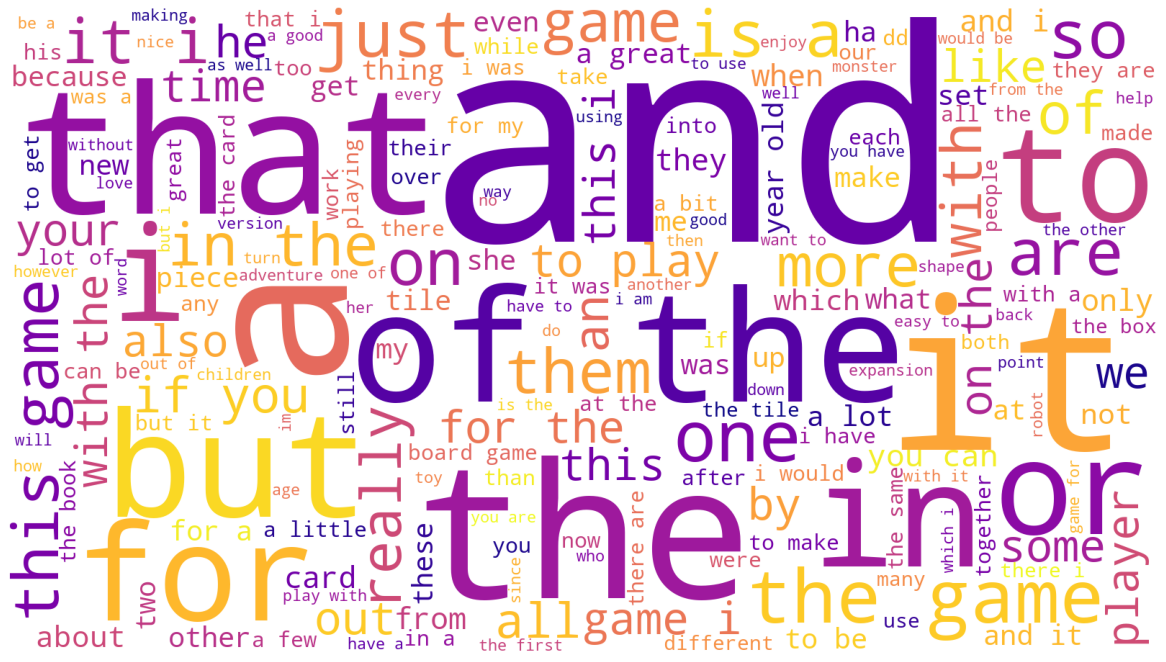

In [24]:
# Review: Plot the WordCloud image.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_rev = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(rev_cloud) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_rev) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


We can see that the wordcloud without the stop words is not very useful</br>
that is why we plan to remove the stop words in our following steps

In [25]:
# Summary: Create a word cloud.
# String all the comments together in a single variable.
# Create an empty string variable.
sum_cloud = ''
for i in range(df4.shape[0]):
    # Add each comment.
    sum_cloud = sum_cloud + df4['summary'][i]

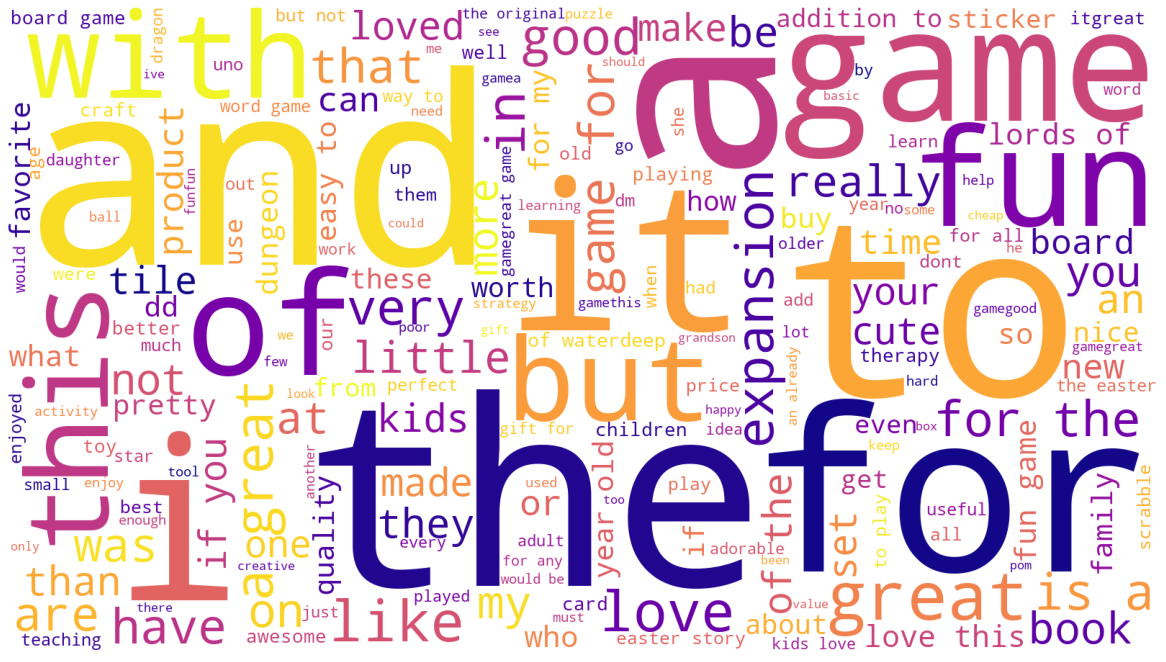

In [26]:
# Summary: Plot the WordCloud image.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_sum = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(sum_cloud) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_sum) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


same results for both columns with wordcloud that cannot give us at first look the sentiment of users

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [28]:
# Determine the frequency distribution.
#Freq for Review
# Define an empty list of tokens.
rev_freq = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    rev_freq = rev_freq + df4['rev_tokens'][i]

# Calculate the frequency distribution.
fdist1 = FreqDist(rev_freq)

# Preview data.
fdist1

FreqDist({'the': 5021, 'and': 2934, 'to': 2843, 'a': 2830, 'of': 2262, 'i': 1888, 'it': 1830, 'is': 1594, 'this': 1551, 'for': 1361, ...})

In [29]:
#Freq for Summary
# Define an empty list of tokens.
sum_freq = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    sum_freq = rev_freq + df4['sum_tokens'][i]

# Calculate the frequency distribution.
fdist2 = FreqDist(sum_freq)

# Preview data.
fdist2

FreqDist({'the': 5022, 'and': 2934, 'to': 2843, 'a': 2830, 'of': 2262, 'i': 1888, 'it': 1830, 'is': 1594, 'this': 1551, 'for': 1362, ...})

We can see that most frequent appearance of words comes from stopwords which confirms once more</br>
that is an essential step to take to get to the core of users' sentiment

### 4b) Remove alphanumeric characters and stopwords

In [30]:
# Delete all the alphanum.
#For Review
tokens_r = [word for word in rev_freq if word.isalnum()]

In [31]:
# Delete all the alphanum.
#For Summary
tokens_s = [word for word in sum_freq if word.isalnum()]

In [32]:
# Remove all the stopwords
tokens = tokens_r + tokens_s
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens = [x for x in tokens if x.lower() not in english_stopwords]

### 4c) Create wordcloud without stopwords

In [33]:
# Create a wordcloud without stop words.
# Define an empty string variable.
tokens_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens_string = tokens_string + value + ' '

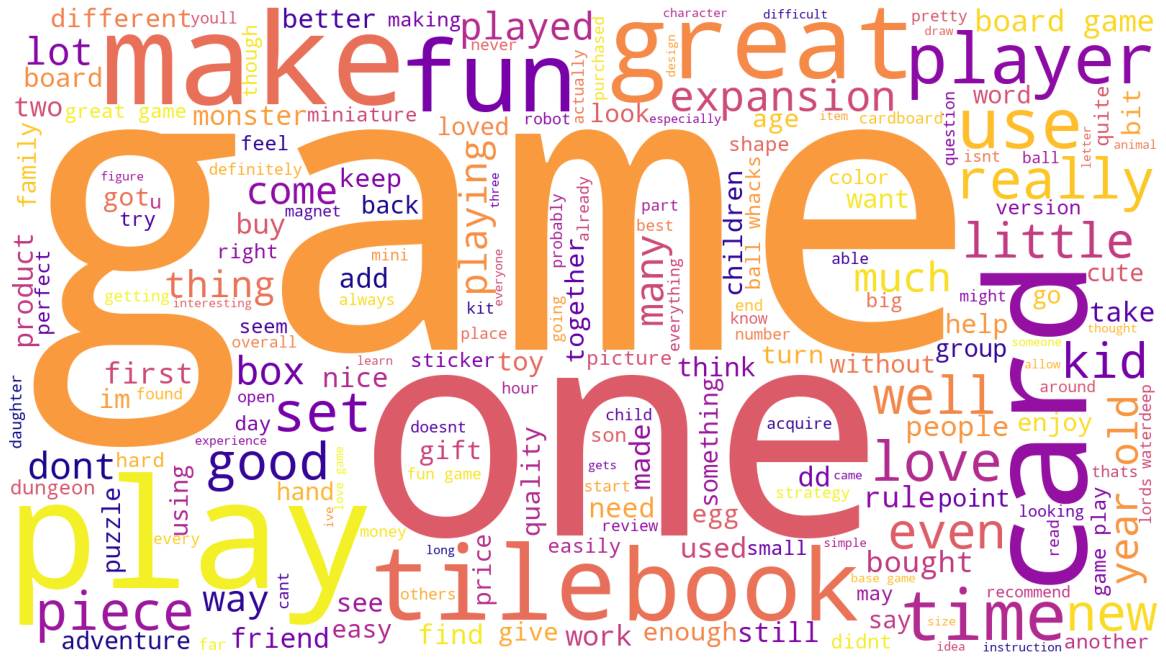

In [34]:
# Plot the wordcloud image.
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


* We can immediately identify positivity from the wordcloud without stopwords for the review column

### 4d) Identify 15 most common words and polarity

In [35]:
# Determine the 15 most common words.
# View the frequency distribution.
fdist1 = FreqDist(tokens)

# Preview the data.
fdist1 

FreqDist({'game': 2721, 'one': 950, 'play': 884, 'fun': 814, 'great': 784, 'like': 746, 'get': 586, 'cards': 562, 'tiles': 560, 'really': 556, ...})

In [36]:
# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,2721
one,950
play,884
fun,814
great,784
like,746
get,586
cards,562
tiles,560


* The positivity of the wordcloud is quickly confirmed by running the frequency counter</br>
where among the most frequent words we have "fun, great and like"

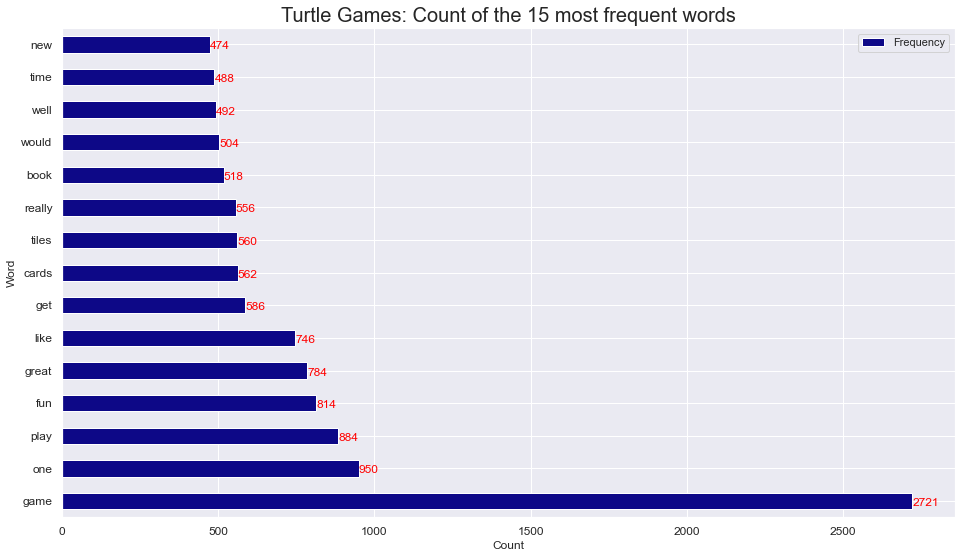

In [37]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Games: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

**Applying original cleaned df (df_NLP) as we can get very interesting results**</br>
Our aim is to combine other fields from the original dataframe of turtle_reviews.csv in order to associate positive</br>
comments with particular genre of clientele (and also cross compare same with our clustering results from k-means analysis)

In [53]:
# Import the necessary package.
from textblob import TextBlob
# Provided function polarity.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]
# Provided function subjectivity.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [54]:
# Determine polarity of review column
df_NLP['polarity_rev'] = df_NLP['review'].apply(generate_polarity)

# Determine sentiment of review column
df_NLP['senti_rev'] = df_NLP['review'].apply(generate_subjectivity)
# View output.
df_NLP.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary,polarity_rev,senti_rev,polarity_sum,senti_sum
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,-0.036111,0.486111,0.15,0.15
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,0.035952,0.442976,-0.80,-0.80
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",0.116640,0.430435,0.00,0.00
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,0.628788,0.784848,0.00,0.00
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,-0.316667,0.316667,0.00,0.00


In [55]:
#Repeat for summary column
df_NLP['polarity_sum'] = df_NLP['summary'].apply(generate_polarity)

# Determine sentiment of review column
df_NLP['senti_sum'] = df_NLP['summary'].apply(generate_subjectivity)
# View output.
df_NLP.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary,polarity_rev,senti_rev,polarity_sum,senti_sum
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,-0.036111,0.486111,0.15,0.500000
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,0.035952,0.442976,-0.80,0.900000
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",0.116640,0.430435,0.00,0.733333
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,0.628788,0.784848,0.00,0.000000
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,-0.316667,0.316667,0.00,0.000000


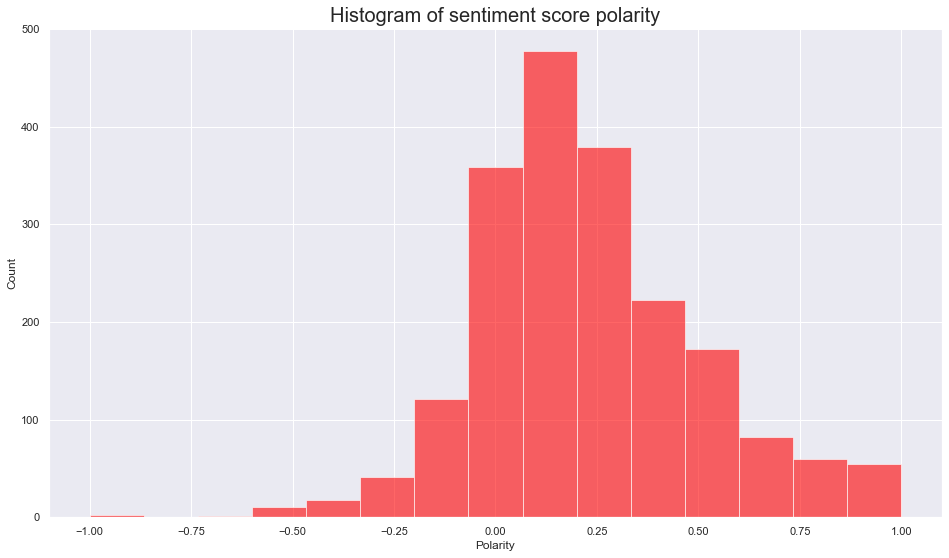

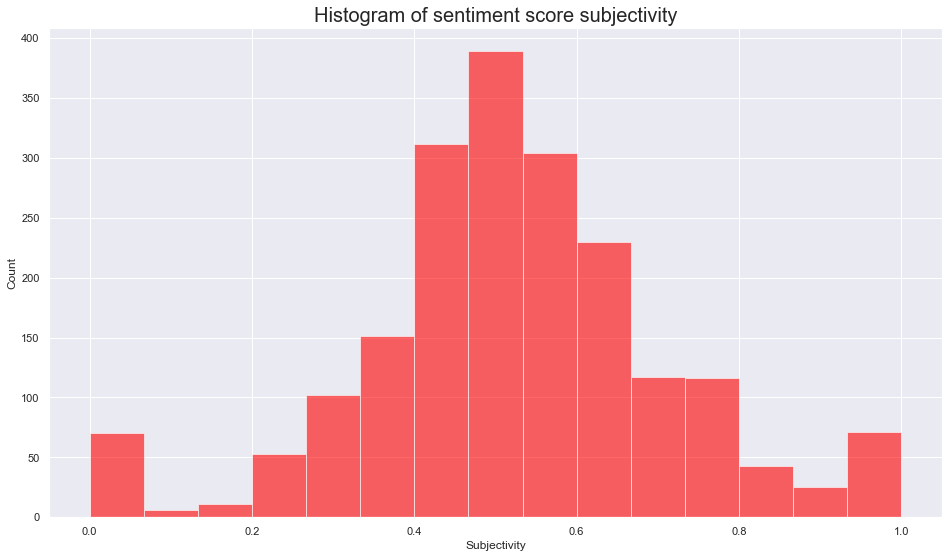

In [57]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_NLP['polarity_rev'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

# Histogram of sentiment score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_NLP['senti_rev'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity', fontsize=20)

plt.show()

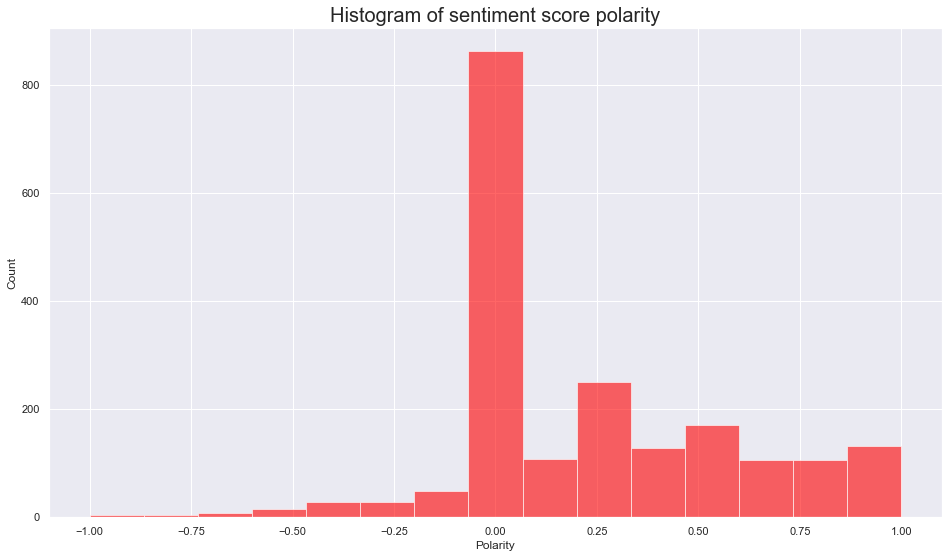

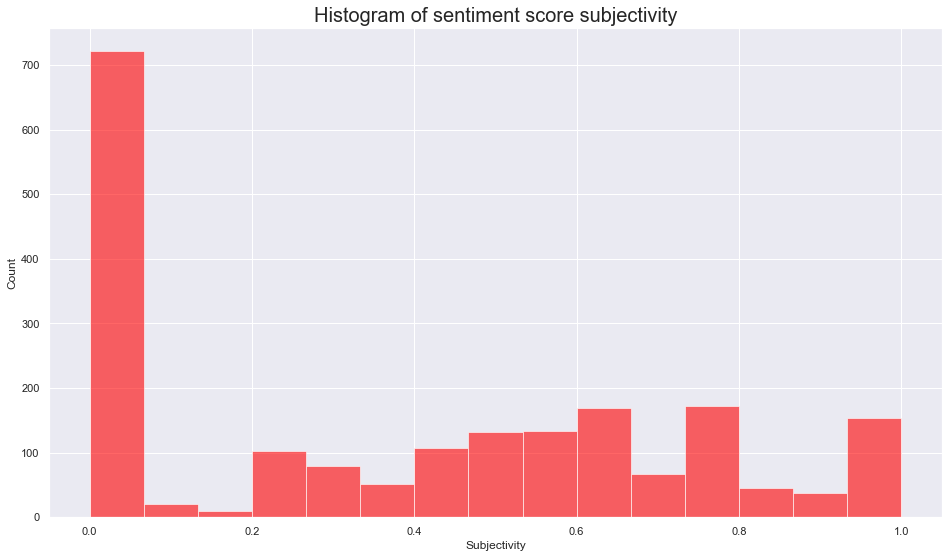

In [58]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_NLP['polarity_sum'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

# Histogram of sentiment score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_NLP['senti_sum'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [44]:
df_NLP.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary,polarity_rev,senti_rev,polarity_sum,senti_sum
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,-0.036111,-0.036111,0.15,0.15
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,0.035952,0.035952,-0.80,-0.80
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",0.116640,0.116640,0.00,0.00
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,0.628788,0.628788,0.00,0.00
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,-0.316667,-0.316667,0.00,0.00


In [45]:
#Create the dataframe Top 20 negative reviews.
df5_neg = df_NLP.nsmallest(20, 'polarity_rev')

#Eliminate unnecessary columns
df5_neg = df5_neg[['review','gender','age','renumeration','spending_score','loyalty_points','education']]

# View output.
df5_neg.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,gender,age,renumeration,spending_score,loyalty_points,education
208,BOOO UNLES YOU ARE PATIENT KNOW HOW TO MEASURE I DIDN'T HAVE THE PATIENCE NEITHER DID MY DAUGHTER. BORING UNLESS YOU ARE A CRAFT PERSON WHICH I AM NOT.,Male,66,15.580000,3,31,PhD
182,Incomplete kit! Very disappointing!,Male,44,80.360000,15,881,PhD
989,"If you, like me, used to play D&D, but now you and your friends ""growed up"" and can't be together because all the responsibilities and bla bla bla... this game is for you! Come to the Dungeon!",Female,38,84.460000,85,5019,graduate
1804,"I'm sorry. I just find this product to be boring and, to be frank, juvenile.",Female,33,13.120000,77,663,graduate
364,"One of my staff will be using this game soon, so I don't know how well it works as yet, but after looking at the cards, I believe it will be helpful in getting a conversation started regarding anger and what to do to control it.",Male,49,69.700000,26,1344,Basic
117,I bought this as a Christmas gift for my grandson. Its a sticker book. So how can I go wrong with this gift.,Female,49,53.300000,59,2332,postgraduate
227,this was a gift for my daughter. I found it difficult to use,Male,37,22.960000,61,969,graduate
230,I found the directions difficult,Male,62,24.600000,4,69,PhD
290,Instructions are complicated to follow,Female,70,48.380000,55,1658,graduate
301,Difficult,Female,49,50.840000,48,1809,graduate


In [46]:
#sort DF for useful insights 
df5_neg.sort_values(by=['renumeration','spending_score'], inplace=True, ascending=False)
df5_neg

,review,gender,age,renumeration,spending_score,loyalty_points,education
989,"If you, like me, used to play D&D, but now you...",Female,38,84.46,85,5019,graduate
182,Incomplete kit! Very disappointing!,Male,44,80.36,15,881,PhD
1524,Expensive for what you get.,Female,25,72.16,13,522,graduate
174,I sent this product to my granddaughter. The p...,Female,51,72.16,13,696,postgraduate
364,"One of my staff will be using this game soon, ...",Male,49,69.70,26,1344,Basic
347,My 8 year-old granddaughter and I were very fr...,Female,34,63.14,74,3111,PhD
538,I purchased this on the recommendation of two ...,Male,18,60.68,10,266,graduate
117,I bought this as a Christmas gift for my grand...,Female,49,53.30,59,2332,postgraduate
306,Very hard complicated to make these.,Female,68,51.66,50,1668,postgraduate
301,Difficult,Female,49,50.84,48,1809,graduate


In [47]:
#Create the dataframe Top 20 negative summaries.
df6_neg = df_NLP.nsmallest(20, 'polarity_sum')

#Eliminate unnecessary columns
df6_neg = df6_neg[['summary','gender','age','renumeration','spending_score','loyalty_points','education']]

# View output.
df6_neg.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,gender,age,renumeration,spending_score,loyalty_points,education
21,The worst value I've ever seen,Male,27,19.680000,73,840,postgraduate
208,BORING UNLESS YOU ARE A CRAFT PERSON WHICH I AM ...,Male,66,15.580000,3,31,PhD
829,Boring,Female,25,23.780000,87,1151,graduate
1166,before this I hated running any RPG campaign dealing with towns because it ...,Male,40,70.520000,20,1004,PhD
1,Another worthless Dungeon Master's screen from GaleForce9,Male,23,12.300000,81,524,graduate
144,Disappointed,Male,27,63.140000,12,443,postgraduate
631,Disappointed.,Female,23,24.600000,73,944,graduate
793,Disappointed,Female,38,92.660000,91,5895,graduate
1620,Disappointed,Male,37,39.360000,59,1606,postgraduate
363,Promotes anger instead of teaching calming methods,Female,33,66.420000,93,4052,graduate


In [48]:
#sort DF for usefulel insights 
df6_neg.sort_values(by=['renumeration','spending_score','loyalty_points'], inplace=True, ascending=False)
df6_neg

,summary,gender,age,renumeration,spending_score,loyalty_points,education
793,Disappointed,Female,38,92.66,91,5895,graduate
178,At age 31 I found these very difficult to make...,Male,58,76.26,14,772,diploma
1166,before this I hated running any RPG campaign d...,Male,40,70.52,20,1004,PhD
363,Promotes anger instead of teaching calming met...,Female,33,66.42,93,4052,graduate
144,Disappointed,Male,27,63.14,12,443,postgraduate
518,Mad dragon,Female,50,54.94,43,1752,postgraduate
1115,Disappointing,Female,18,53.30,50,1167,graduate
504,It's UNO for the angry!,Male,49,50.84,56,2111,PhD
101,Small and boring,Female,49,50.84,48,1809,graduate
890,Bad Quality-All made of paper,Female,70,48.38,55,1658,graduate


In [49]:
#Create the dataframe Top 20 positive reviews.
df5_pos = df_NLP.nlargest(20, 'polarity_rev')

#Eliminate unnecessary columns
df5_pos = df5_pos[['review','gender','age','renumeration','spending_score','loyalty_points','education']]

# View output.
df5_pos.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,gender,age,renumeration,spending_score,loyalty_points,education
7,Came in perfect condition.,Female,25,14.760000,94,772,graduate
44,Absolutely great pictures even before coloring!,Female,49,31.980000,28,664,diploma
55,Great!,Male,45,35.260000,41,1062,graduate
165,Awesome book,Female,38,69.700000,75,3654,PhD
194,Awesome gift,Female,45,98.400000,16,1156,graduate
216,Great product! Arrived on time.,Female,37,17.220000,35,417,graduate
318,Great buy!! My granddaughter loves it!!,Female,50,54.940000,43,1752,postgraduate
371,Great!,Male,32,71.340000,75,3455,diploma
418,Great resource for BHIS care coordinators!! Works well with kids and teens on what it says it does!!,Male,51,18.860000,29,406,diploma
474,Great Seller!!! Happy with my purchase!!! 5 starrrr,Male,58,44.280000,47,1504,graduate


In [50]:
#sort DF for useful review insights 
df5_pos.sort_values(by=['renumeration','spending_score'], inplace=True, ascending=False)
df5_pos

,review,gender,age,renumeration,spending_score,loyalty_points,education
194,Awesome gift,Female,45,98.40,16,1156,graduate
591,Wonderful product,Female,34,84.46,69,3880,diploma
790,Perfect!,Female,36,84.46,23,1328,PhD
371,Great!,Male,32,71.34,75,3455,diploma
165,Awesome book,Female,38,69.70,75,3654,PhD
524,"Perfect, just what I ordered!!",Female,25,57.40,29,926,graduate
318,Great buy!! My granddaughter loves it!!,Female,50,54.94,43,1752,postgraduate
517,Great therapy tool!,Female,49,53.30,59,2332,postgraduate
503,Great game...I use it a lot!,Male,28,50.84,55,1673,PhD
496,Excellent activity for teaching self-managemen...,Female,45,49.20,47,1698,postgraduate


In [51]:
#Create the dataframe Top 20 negative summaries.
df6_pos = df_NLP.nlargest(20, 'polarity_sum')

#Eliminate unnecessary columns
df6_pos = df6_pos[['summary','gender','age','renumeration','spending_score','loyalty_points','education']]

# View output.
df6_pos.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,gender,age,renumeration,spending_score,loyalty_points,education
6,Best gm screen ever,Female,37,14.760000,6,61,diploma
28,Wonderful designs.,Female,38,23.780000,31,515,PhD
32,Perfect!,Male,52,27.060000,4,80,PhD
37,Great buy! Can't wait to work on this book,Female,32,27.880000,73,1314,postgraduate
40,So beautiful!,Female,67,31.160000,35,715,graduate
57,great!,Male,71,36.080000,46,1014,PhD
80,They're the perfect size to keep in the car or a diaper ...,Male,56,44.280000,51,1651,graduate
122,Great for a gift!,Female,38,56.580000,58,2294,graduate
134,Perfect for Preschooler,Male,22,59.860000,5,152,graduate
140,Awesome sticker activity for the price,Female,56,61.500000,5,225,diploma


In [52]:
#sort DF for useful SUMMARY insights 
df6_pos.sort_values(by=['renumeration','spending_score','loyalty_points'], inplace=True, ascending=False)
df6_pos

,summary,gender,age,renumeration,spending_score,loyalty_points,education
199,Great product! Darling puppies!,Male,32,112.34,83,6020,PhD
187,Awesome,Male,32,82.82,68,3636,PhD
163,He was very happy with his gift,Female,33,66.42,93,4052,graduate
161,Awesome Book...,Female,29,64.78,83,3285,graduate
140,Awesome sticker activity for the price,Female,56,61.50,5,225,diploma
335,Another great book by Klutz!,Female,29,59.86,88,3218,graduate
134,Perfect for Preschooler,Male,22,59.86,5,152,graduate
122,Great for a gift!,Female,38,56.58,58,2294,graduate
80,They're the perfect size to keep in the car or...,Male,56,44.28,51,1651,graduate
57,great!,Male,71,36.08,46,1014,PhD


# 